In [1]:
# coding=utf-8
import jieba
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from hanziconv import HanziConv

In [5]:
# file path
filePath='/Users/youngmihuang/Downloads/corpusSegDone123.txt'
fileSegWordDonePath ='corpusSegDone_small.txt'

# read the file by file
fileTrainRead = []
with open(filePath) as fileTrainRaw:
    for line in fileTrainRaw:
        fileTrainRead.append(HanziConv.toTraditional(line))

In [6]:
# define this function to print a list with Chinese
def PrintListChinese(list):
    for i in range(len(list)):
        print list[i],

# segment word with jieba
fileTrainSeg=[]
for i in range(len(fileTrainRead)):
    fileTrainSeg.append([' '.join(list(jieba.cut(fileTrainRead[i][9:-11],cut_all=False)))])
    if i % 50000 == 0 :
        print i

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/c6/vq7n4xz94bqdm56d8hb739kr0000gn/T/jieba.cache
Loading model cost 0.640 seconds.
Prefix dict has been built succesfully.


0


In [7]:
# save the result
with open(fileSegWordDonePath,'wb') as fW:
    for i in range(len(fileTrainSeg)):
        fW.write(fileTrainSeg[i][0].encode('utf-8'))
        fW.write('\n')

In [40]:
# jieba seg words transform to word2vec
import word2vec
word2vec.word2vec('corpusSegDone_small.txt', 'corpusWord2Vec_small.bin', size=500,verbose=True)

Starting training using file corpusSegDone_small.txt
Vocab size: 1780
Words in train file: 44880


In [30]:
# define this function to print a list with Chinese
def PrintListChinese(list):
    for i in range(len(list)):
        print list[i],
# to test the segment result
PrintListChinese(fileTrainSeg[10])

  東風   標   緻   小   橘   燈   鄉   村小   學圖   書館   計劃   於   ６   月   ２   ３   日   －   ２   ９   日   在   湖北省   武漢市   新洲   區鳳凰鎮   郭崗小學   舉行   ，   來   自全國   各地   的   ７   名誌 願者   帶   著   東風   標   緻   ５   ０   ８   汽車   捐贈   的   ２   ０   ０   ０   本新書   ，   建立   起有   一所   「   小橘   燈鄉   村小   學圖   書館   」   。   Ｎ   濱   菏行   輪   耷不僅   是   革命   老區   ，   也   是   全國   有名   的   建築   之   鄉   ；   這裡   的   人   大部分   都   外 齣   從事   建築業   ，   導 緻   這裡   的   留守   兒童   比例   其高   。   郭崗   小學現   有   學生   １   ３   ６   名   （   含教學點   一處   ）   ，   其中   住校   學生   ９   ８   名   ，   全校   ９   ０   ％   左右   的   學生   都   是   留守   兒童   。   Ｔ   諢   疃   舉行   之前   ，   學校   圖書   室裡   擺滿   瞭   陳   舊   的   教科   書   ，   這裡   的   學生   在   課外   時間   沒有   課外   書   可以   閱讀   ；   在   誌 願者   問學生   喜歡   讀什麼   書   的   時候   ，   大部分   孩子   的   迴 答   是   「   童話   書   」   ，   當再問   他們   還喜歡   什麼   圖書   的   時候   ，   孩子   迷茫   的   眼神   讓   我們   明白   由   於   沒   有   接觸   過課   外書   ，   很多   孩子   不   知道   除 瞭   童話   書   以外   還有   什麼   類別   的   書   可以   閱讀   

In [41]:
# see the word2vector
model = word2vec.load('corpusWord2Vec_small.bin')
print model.vectors

[[ 0.06097658  0.06732481 -0.05834987 ...,  0.01120182 -0.06314767
  -0.02066723]
 [-0.00962261  0.04325145 -0.01463535 ...,  0.06910425 -0.01413807
  -0.04255764]
 [ 0.00664448  0.04895987 -0.02673419 ...,  0.0658877  -0.01178703
  -0.04966968]
 ..., 
 [-0.00400986  0.03653423 -0.0183589  ...,  0.06966398 -0.01946967
  -0.04907073]
 [-0.02120665  0.02124848 -0.00288035 ...,  0.06813996 -0.02478162
  -0.04058759]
 [-0.01766737  0.0263     -0.00922201 ...,  0.06867567 -0.02189532
  -0.04273112]]


In [88]:
# see the example of vocabulary from 996 to 1000
for i in range(995,1000):
    print model.vocab[i]

國務院
油價
關
人次
計劃署


In [44]:
# check correlation of the specific word
indexes = model.cosine(u'經濟')
for index in indexes[0]:
    print model.vocab[index]

生態
以及
政策
情況
程度
此次
西藏
綠化
提升
小


In [74]:
indexes = model.cosine(u'企業')
for index in indexes[0]:
    print model.vocab[index]

關注
條件
能夠
新
掉
成本
不再
一定
工作
更


In [75]:
# load the word2vec model
rawWordVec = model.vectors
 
# reduce the dimension of word vector
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)
 
# show some word(center word) and it's similar words
index1,metrics1 = model.cosine(u'經濟')
index2,metrics2 = model.cosine(u'企業')

 
# add the index of center word 
index01=np.where(model.vocab==u'企業')
index02=np.where(model.vocab==u'經濟')

index1=np.append(index1,index01)
index2=np.append(index2,index02)

 

## Comment: 
### Sample小的文檔其分詞效果較差，因資料內容的豐富度有限，導致結果會有點不準確

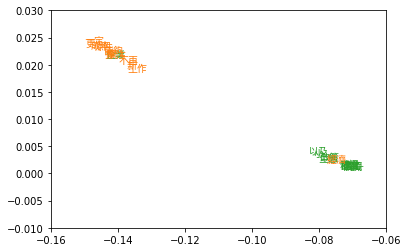

In [87]:
# plot the result
zhfont = matplotlib.font_manager.FontProperties(fname='/Users/youngmihuang/Downloads/wqy-microhei.ttc')
fig = plt.figure()
ax = fig.add_subplot(111)
 
for i in index1:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C2')

for i in index2:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C1')


ax.axis([-0.16,-0.06, -0.01,0.03])
plt.figure(figsize=(30,30))
plt.show()